In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from geopy.distance import geodesic

In [56]:
diary = pd.read_csv("../data-sources/cleandiary.csv")
paths = diary.PathFile.tolist()
diary["LinearDistance"] = np.nan
diary["ActualDistance"] = np.nan
diary["FlightTime"] = np.nan

for p in range(len(paths)):
    if (os.path.exists("../data-sources/allflights/"+paths[p]+".csv")):
        coords = pd.read_csv("../data-sources/allflights/"+paths[p]+".csv")
        startindex = (coords.Altitude != 0).idxmax()
        endindex = (coords.Altitude != 0).idxmin()
        if endindex == 0:
            endindex = coords.Altitude.size - 1
        startc = coords.Position[startindex]
        endc = coords.Position[endindex]
        timediff = coords.Timestamp[endindex] - coords.Timestamp[startindex]
        lineardistance = geodesic(startc,endc).meters
        actualdistance = 0
        for i in range(startindex,endindex-1,1):
            actualdistance += geodesic(coords.Position[i],coords.Position[i+1]).meters
        diary.loc[p, "LinearDistance"] = lineardistance / 1000
        diary.loc[p, "ActualDistance"] = actualdistance / 1000
        diary.loc[p, "FlightTime"] = timediff

diary.to_csv("../data-sources/cleandiary.csv", index=False)

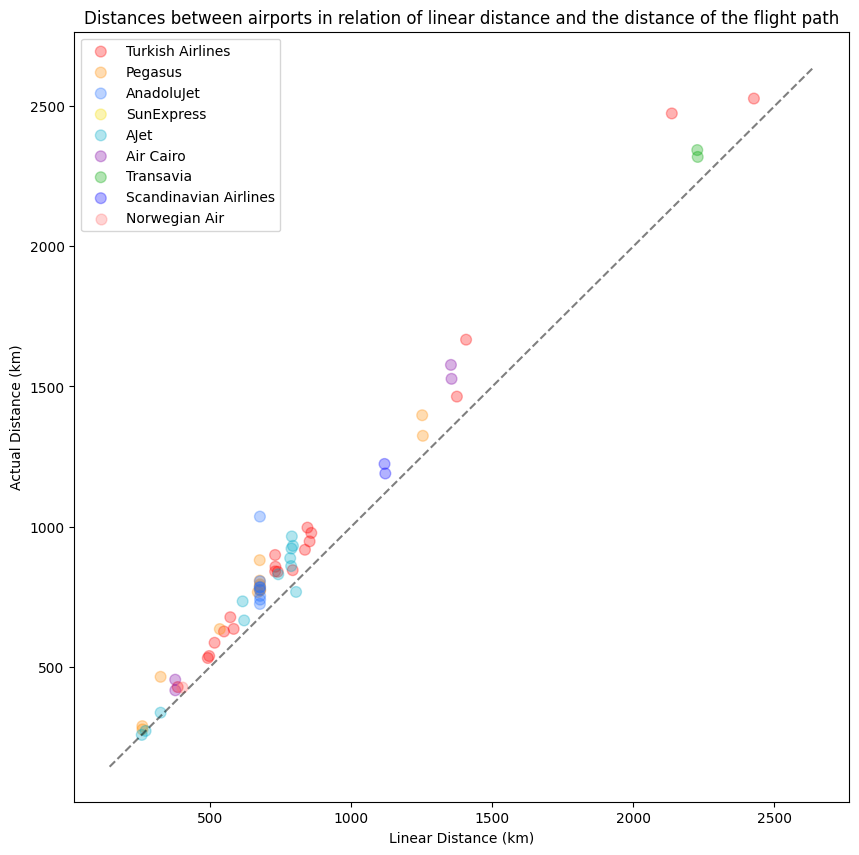

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
for a in diary['Airline'].unique():
    scatterthis = diary[(diary['Airline']==a)]
    ax.scatter(scatterthis['LinearDistance'], scatterthis['ActualDistance'], alpha=0.3, s=60, label=a, c=scatterthis['AirlineColor'])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
]
ax.plot(lims, lims, 'k--', alpha=0.5)
ax.set_xlabel('Linear Distance (km)')
ax.set_ylabel('Actual Distance (km)')
ax.set_title('Distances between airports in relation of linear distance and the distance of the flight path')
ax.legend()
plt.show()